In [8]:
import obspy
from obspy.clients.fdsn.mass_downloader import RectangularDomain, \
    Restrictions, MassDownloader

# Rectangular domain containing parts of southern Germany.
domain = RectangularDomain(minlatitude=8.026243, maxlatitude=8.941965,
                           minlongitude=46.626380, maxlongitude=47.700497)

restrictions = Restrictions(
    # Get data for a few days.
    starttime=obspy.UTCDateTime(2012, 2, 11),
    endtime=obspy.UTCDateTime(2012, 2, 12),
    # Chunk it to have one file per 10 min.
    chunklength_in_sec=600,
    # Considering the enormous amount of data associated with continuous
    # requests, you might want to limit the data based on SEED identifiers.
    # If the location code is specified, the location priority list is not
    # used; the same is true for the channel argument and priority list.
    #network="*", station="*", location="*", channel="*",
    # The typical use case for such a data set are noise correlations where
    # gaps are dealt with at a later stage.
    reject_channels_with_gaps=False,
    # Same is true with the minimum length. All data might be useful.
    minimum_length=0.0,
    # Guard against the same station having different names.
    minimum_interstation_distance_in_m=100.0)

# Restrict the number of providers if you know which serve the desired
# data. If in doubt just don't specify - then all providers will be
# queried.
mdl = MassDownloader(providers=['http://arclink.ethz.ch/'], debug=True) #providers=["LMU", "GFZ"])
mdl.download(domain, restrictions, mseed_storage="waveforms",
             stationxml_storage="stations")

[2016-09-08 10:27:49,732] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for http://arclink.ethz.ch/.
[2016-09-08 10:27:49,735] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 1 client(s): http://arclink.ethz.ch/.
[2016-09-08 10:27:49,736] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2016-09-08 10:27:49,737] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://arclink.ethz.ch/' - Requesting unreliable availability.
[2016-09-08 10:27:49,752] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://arclink.ethz.ch/' - No data available for request.
[2016-09-08 10:27:49,752] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://arclink.ethz.ch/' - No data available.
[2016-09-08 10:27:49,754] - obspy.clients.fdsn.mass_downloader - INFO: ============================== Final report
[2016-09-08 10:27:49,755] - obspy.clients.fdsn.mass_downloader - INFO: 0 MiniSEED files [0.0 MB] already e

Base URL: http://arclink.ethz.ch
Request Headers: {'User-Agent': 'ObsPy 1.0.2 (Darwin-15.6.0-x86_64-i386-64bit, Python 3.5.2)'}
Loading discovered services from cache.
Downloaded http://arclink.ethz.ch/fdsnws/station/1/query?format=text&level=channel&maxlatitude=8.941965&minlatitude=8.026243&endtime=2012-02-12T00%3A00%3A00.000000&maxlongitude=47.700497&minlongitude=46.62638&starttime=2012-02-11T00%3A00%3A00.000000 with HTTP code: 204


{'http://arclink.ethz.ch/': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x103f41b70>}

<IPython.core.display.Javascript object>


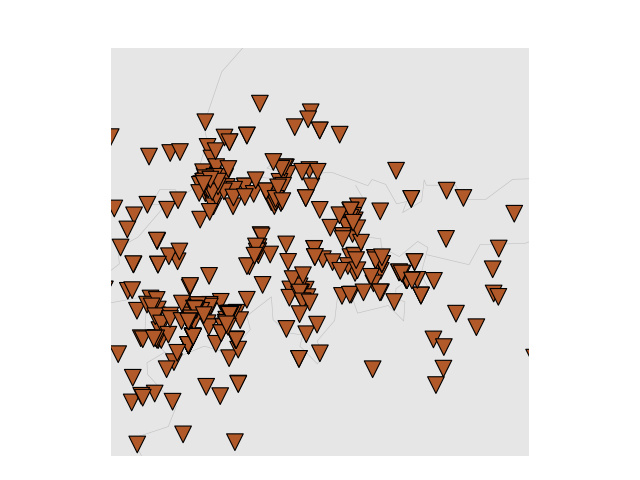

<IPython.core.display.Javascript object>


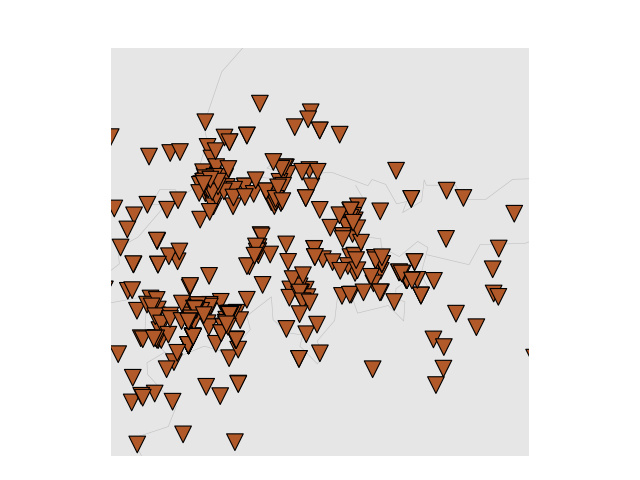

In [2]:
%matplotlib notebook 
from obspy import read_inventory
inv = read_inventory('smi:ch.ethz.sed-KP201202112245.MANUPDEPICK-20121012194222-event-1/stations.xml')
inv.plot()